In [235]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("Interact")
Pkg.add("IJulia")
Pkg.add("WebIO")
using DataFrames
using Plots
using Interact
using IJulia
using WebIO

WebIO.install_jupyter_nbextension()

  Resolving package versions...
No Changes to `~/Project.toml`
No Changes to `~/Manifest.toml`
  Resolving package versions...
No Changes to `~/Project.toml`
No Changes to `~/Manifest.toml`
  Resolving package versions...
No Changes to `~/Project.toml`
No Changes to `~/Manifest.toml`
  Resolving package versions...
No Changes to `~/Project.toml`
No Changes to `~/Manifest.toml`
  Resolving package versions...
No Changes to `~/Project.toml`
No Changes to `~/Manifest.toml`
┌ Info: Installing Jupyter WebIO extension...
│   cmd = `/srv/conda/envs/notebook/bin/jupyter nbextension install --user /srv/julia/pkg/packages/WebIO/Fy9h1/deps/bundles/webio-jupyter-notebook.js`
└ @ WebIO /srv/julia/pkg/packages/WebIO/Fy9h1/deps/jupyter.jl:237
Up to date: /srv/conda/envs/notebook/share/jupyter/nbextensions/webio-jupyter-notebook.js

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable <the entry point> --user
    
┌ I

In [233]:
function rk4(r,t,h,a,b,c,d)
    k1 = h*f(r, t,a,b,c,d)
    k2 = h*f(r+0.5*k1, t+0.5*h,a,b,c,d)
    k3 = h*f(r+0.5*k2, t+0.5*h,a,b,c,d)
    k4 = h*f(r+k3, t+h,a,b,c,d)
    (k1 + 2*k2 + 2*k3 + k4)/6
end

function f(r, t,a,b,c,d)
    #a = 0.3  #wsp. śmierci d. z powodu braku o.
    #b = 0.3  #wsp. narodzin o. gdy nie ma d.
    #c = 0.8  #efektywność wykorzystania energii przez d.
    #d = 0.8  #efektywność zabijania
    x, y = r[1], r[2]
    fxd = -a*x + c*d*x*y
    fyd = b*y - d*x*y
    [fxd, fyd]
end

function conv(x)
    y = 1 
    while x > 1
        x = x/10
        y = y*10
    end
    x,y
end

conv (generic function with 1 method)

In [229]:
#funkcja simulate do wygenerowania wykresu dla symulacji
#argumenty: 
#dr = początkowa populacja drapieżników           (default 200)
#of = początkowa populacja ofiar                  (default 200)
#a = wsp. śmierci d. z powodu braku o.            (default 0.3)
#b = wsp. narodzin o. gdy nie ma d.               (default 0.3)
#c = efektywność wykorzystania energii przez d.   (default 0.8)
#d = efektywność zabijania                        (default 0.8)
#time = długość symulacji                         (default 200)

function simulate(dr=200,of=200,a=0.3,b=0.3,c=0.8,d=0.8,time=200)
    pd = conv(dr)
    po = conv(of)
    h = 0.1
    tpoints = collect(0:h:time)         
    xpoints, ypoints  = [], []
    r = [pd[1], po[1]]                 #stosunek populacji
    
    for t in tpoints
        append!(xpoints, r[1] * pd[2])
        append!(ypoints, r[2] * po[2])
        r += rk4(r, t, h,a,b,c,d)  
    end
    
    plot(tpoints, xpoints, label="Drapieżniki", color="red")
    plot!(tpoints, ypoints, label="Ofiary", color="green")
    xlabel!("Czas")
    ylabel!("Populacja")
end

simulate (generic function with 8 methods)

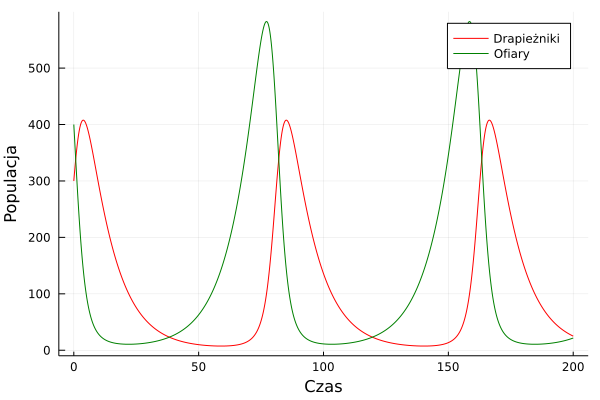

In [253]:
simulate(300,400,0.1,0.1,0.7,1.0)

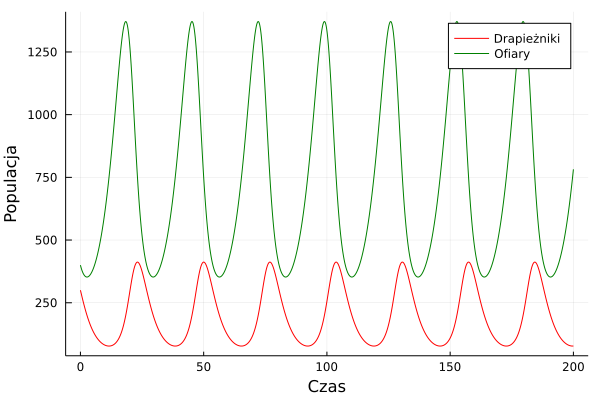

In [254]:
simulate(300,400,0.3,0.2,0.4,1.0)

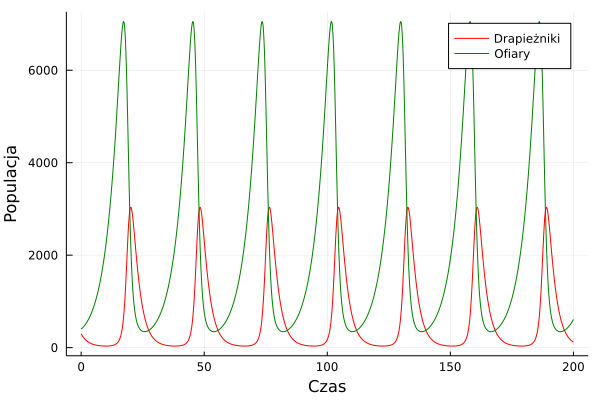

In [255]:
simulate(300,400,0.4,0.2,0.6,0.3)

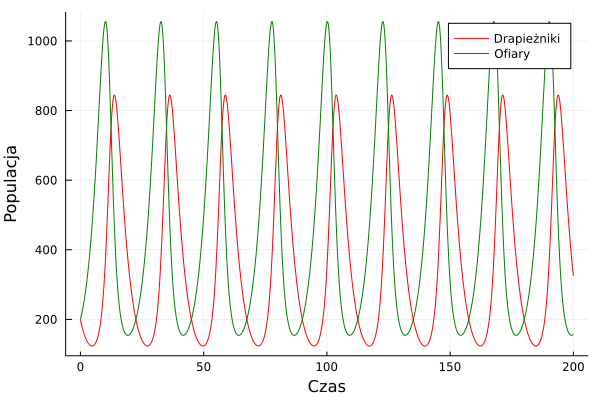

In [256]:
simulate()